<h5 style="font-family:consolas">importing packages and files<h5>
<h5 style="font-family:consolas">packages: pandas , numpy , matplotlib and requests<h5>
<h5 style="font-family:consolas;font-size:18px;">files: tweet json file , image predictions file and twitter archive file<h5>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
ta= pd.read_csv("./twitter-archive-enhanced.csv")
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [ ]:
import tweepy
import pandas as pd
import json
from timeit import default_timer as timer

# Load CSV file with REAL tweet IDs
tweet_ids = ta["tweet_id"].astype(str).values

# Your real bearer token here
bearer_token = "AAAAAAAAAAAAAAAdjhdshbX2KX7PGvULAcCRlSTfS0b12aM%"

client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

count = 0
start = timer()

with open('tweetjson.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(f"{count}: {tweet_id}")
        tweet = client.get_tweet(tweet_id, tweet_fields=["text", "created_at", "author_id", "public_metrics"])
        print("Success")
        json.dump(tweet.data.data, outfile)
        outfile.write('\n')

end = timer()
print("Time taken:", end - start)


In [ ]:
tj= pd.read_json("./tweet-json.txt", lines=True)

In [4]:
tj.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

ip= pd.read_csv("./image-predictions.tsv", sep='\t')
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#####<h5 style="font-family:consolas">assessing data<h5>#####

In [6]:
ta.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2027,671874878652489728,NaN,NaN,2015-12-02 02:13:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671874878...,10,10,Mia,NaN,NaN,NaN,NaN
437,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,NaN,NaN,NaN,NaN,NaN
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,pupper,NaN
1227,713909862279876608,NaN,NaN,2016-03-27 02:05:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Doug. His nose is legendary af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/iDWlapaXWmm,12,10,Doug,NaN,NaN,NaN,NaN
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,NaN,NaN,NaN,NaN,NaN


In [7]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [8]:
ta.duplicated().sum()

np.int64(0)

In [9]:
tj.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1972,2015-12-05 14:35:56+00:00,673148804208660480,673148804208660480,This is Fletcher. He's had a ruff night. No mo...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673148794221932544, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1822,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
776,2016-09-14 16:00:49+00:00,776088319444877312,776088319444877312,I can't tap the screen to make the hearts appe...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776088309558874112, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2045,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1450,2016-02-06 00:35:13+00:00,695767669421768709,695767669421768704,If you are aware of who is making these please...,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695767665437233153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6.753494e+17,...,2060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1836,2015-12-13 04:40:46+00:00,675898130735476737,675898130735476736,I'm sure you've all seen this pupper. Not prep...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675898073508421632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1774,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1626,2016-01-06 04:11:43+00:00,684588130326986752,684588130326986752,This pupper just got his first kiss. 12/10 he'...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,4489,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [11]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
ip.duplicated().sum()

np.int64(0)

<h5>🔍 Data Quality Issues :</h5>
<h5>1: There are missing values in ta and tj</h5>
<h5>2: Timestamp column should be datatime type not object</h5>
<h5>3: some dogs names in image predictions file or not captalized</h5>
<h5>4: Retweets in ta are not good for analysis and should be removed.</h5>
<h5>5: there is some duplicated urls</h5>
<h5>6: The full_text field  contains text with inconsistent formatting, such</h5>
<h5>7: sometimes rating denemanotor is not 10</h5>
<h5>8: some tweets don't describe a dog</h5>
<h5>----------------------</h5>


<h5>🔍 Data Tidness Issues :</h5>
<h5>1: There are missing values in ta and tj</h5>
<h5>2: Timestamp column should be datatime type not object</h5>

#####<h5 style="font-family:consolas;">cleaning twitter-archive-enhanced file ( ta )<h5>#####

In [14]:
# make data for visulazation
tacopy=ta.copy()

In [15]:
# clean data
tacopy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [16]:
tacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [17]:
tacopy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


define

--- doggo floofer pupper columns are in multiple columns 

code

In [18]:
# merge dog stage columns into a single column
tacopy["dog_stage"] = tacopy[["doggo", "floofer", "pupper", "puppo"]].apply(
    lambda x: ', '.join(x.dropna().replace("not", "").unique()), axis=1
)
tacopy["dog_stage"] = tacopy["dog_stage"].replace("", "None")

tacopy = tacopy[tacopy["retweeted_status_id"].isnull() & tacopy["retweeted_status_user_id"].isnull() & tacopy["retweeted_status_timestamp"].isnull()]

tacopy.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace=True)

tacopy.drop(columns=["pupper", "floofer", "puppo", "doggo"], inplace=True)

test

In [19]:
tacopy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,https://twitter.com/dog_rates/status/686749460...,8,10,NaN,None
747,779834332596887552,NaN,NaN,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,None


In [20]:
tacopy.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2097
in_reply_to_user_id      2097
timestamp                   0
source                      0
text                        0
expanded_urls              58
rating_numerator            0
rating_denominator          0
name                      680
dog_stage                   0
dtype: int64

define

----- there is nulls

code

In [21]:
tacopy["in_reply_to_status_id"] = tacopy["in_reply_to_status_id"].fillna("unknown")
tacopy["in_reply_to_user_id"] = tacopy["in_reply_to_user_id"].fillna("unkown")
tacopy["name"] = tacopy["name"].fillna("unkown")
tacopy["expanded_urls"] = tacopy["expanded_urls"].fillna("unkown")

test

In [22]:
tacopy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,unknown,unkown,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,unknown,unkown,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,unknown,unkown,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,unknown,unkown,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,unknown,unkown,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [23]:
tacopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2175 non-null   int64 
 1   in_reply_to_status_id  2175 non-null   object
 2   in_reply_to_user_id    2175 non-null   object
 3   timestamp              2175 non-null   object
 4   source                 2175 non-null   object
 5   text                   2175 non-null   object
 6   expanded_urls          2175 non-null   object
 7   rating_numerator       2175 non-null   int64 
 8   rating_denominator     2175 non-null   int64 
 9   name                   2175 non-null   object
 10  dog_stage              2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


define

----- timestamp column isn't datatime type

code

In [24]:
tacopy["timestamp"] = pd.to_datetime(tacopy["timestamp"])

test

In [25]:
tacopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  2175 non-null   object             
 2   in_reply_to_user_id    2175 non-null   object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2175 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 

In [26]:
tacopy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,unknown,unkown,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,unknown,unkown,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,unknown,unkown,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,unknown,unkown,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,unknown,unkown,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


####<h5 style="font-family:consolas">cleaning image predictions file ( ip )<h5>####

In [27]:
ipcopy=ip.copy()

In [28]:
ipcopy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
ipcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h5 style="font-family:consolas">cleaning twitter json file ( tj )<h5>

In [30]:
tjcopy=tj.copy()

In [31]:
tjcopy.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [32]:
tjcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [33]:
tjcopy.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

define

---- there is nulls

code

In [34]:
tjcopy.drop(columns=["geo", "coordinates", "place","retweeted_status","quoted_status_id","quoted_status_id_str","quoted_status","in_reply_to_status_id","in_reply_to_status_id_str","in_reply_to_user_id","in_reply_to_user_id_str","in_reply_to_screen_name","contributors"], inplace=True)

test

In [35]:
tjcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

In [36]:
tjcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

In [37]:
tjcopy.isnull().sum()

created_at                         0
id                                 0
id_str                             0
full_text                          0
truncated                          0
display_text_range                 0
entities                           0
extended_entities                281
source                             0
user                               0
is_quote_status                    0
retweet_count                      0
favorite_count                     0
favorited                          0
retweeted                          0
possibly_sensitive               143
possibly_sensitive_appealable    143
lang                               0
dtype: int64

define

---- there is numbers columns that have nulls

code

In [38]:
mean = tjcopy.select_dtypes(include=['int64', 'float64']).mean()
tjcopy.fillna(mean, inplace=True)

test

In [39]:
tjcopy.isnull().sum()

created_at                         0
id                                 0
id_str                             0
full_text                          0
truncated                          0
display_text_range                 0
entities                           0
extended_entities                281
source                             0
user                               0
is_quote_status                    0
retweet_count                      0
favorite_count                     0
favorited                          0
retweeted                          0
possibly_sensitive                 0
possibly_sensitive_appealable      0
lang                               0
dtype: int64

In [40]:
tjcopy.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,0.0,0.0,en


In [41]:
tjcopy.fillna(value="unkown", inplace=True)

In [42]:
tjcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2354 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

####<h5 style="font-family:consolas">storing data<h5>####

In [43]:

tacopy.rename(columns={'tweet_id': 'id'}, inplace=True)
tacopy.head(1)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,unknown,unkown,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


In [44]:
tjcopy.rename(columns={'tweet_id': 'id'}, inplace=True)

tjcopy.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en


In [45]:
# make a csv file called twitter_archive_master.csv
tm = pd.merge(tacopy, tjcopy, on='id', how='inner')
tm = pd.merge(tm, ip, left_on='id', right_on='tweet_id', how='inner')

tm.to_csv('twitter_archive_master.csv', index=False)
tm.head()

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,unknown,unkown,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,unknown,unkown,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,unknown,unkown,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,unknown,unkown,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,unknown,unkown,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<h5 style="font-family:consolas">Analyzing and Visualizing Data<h5>

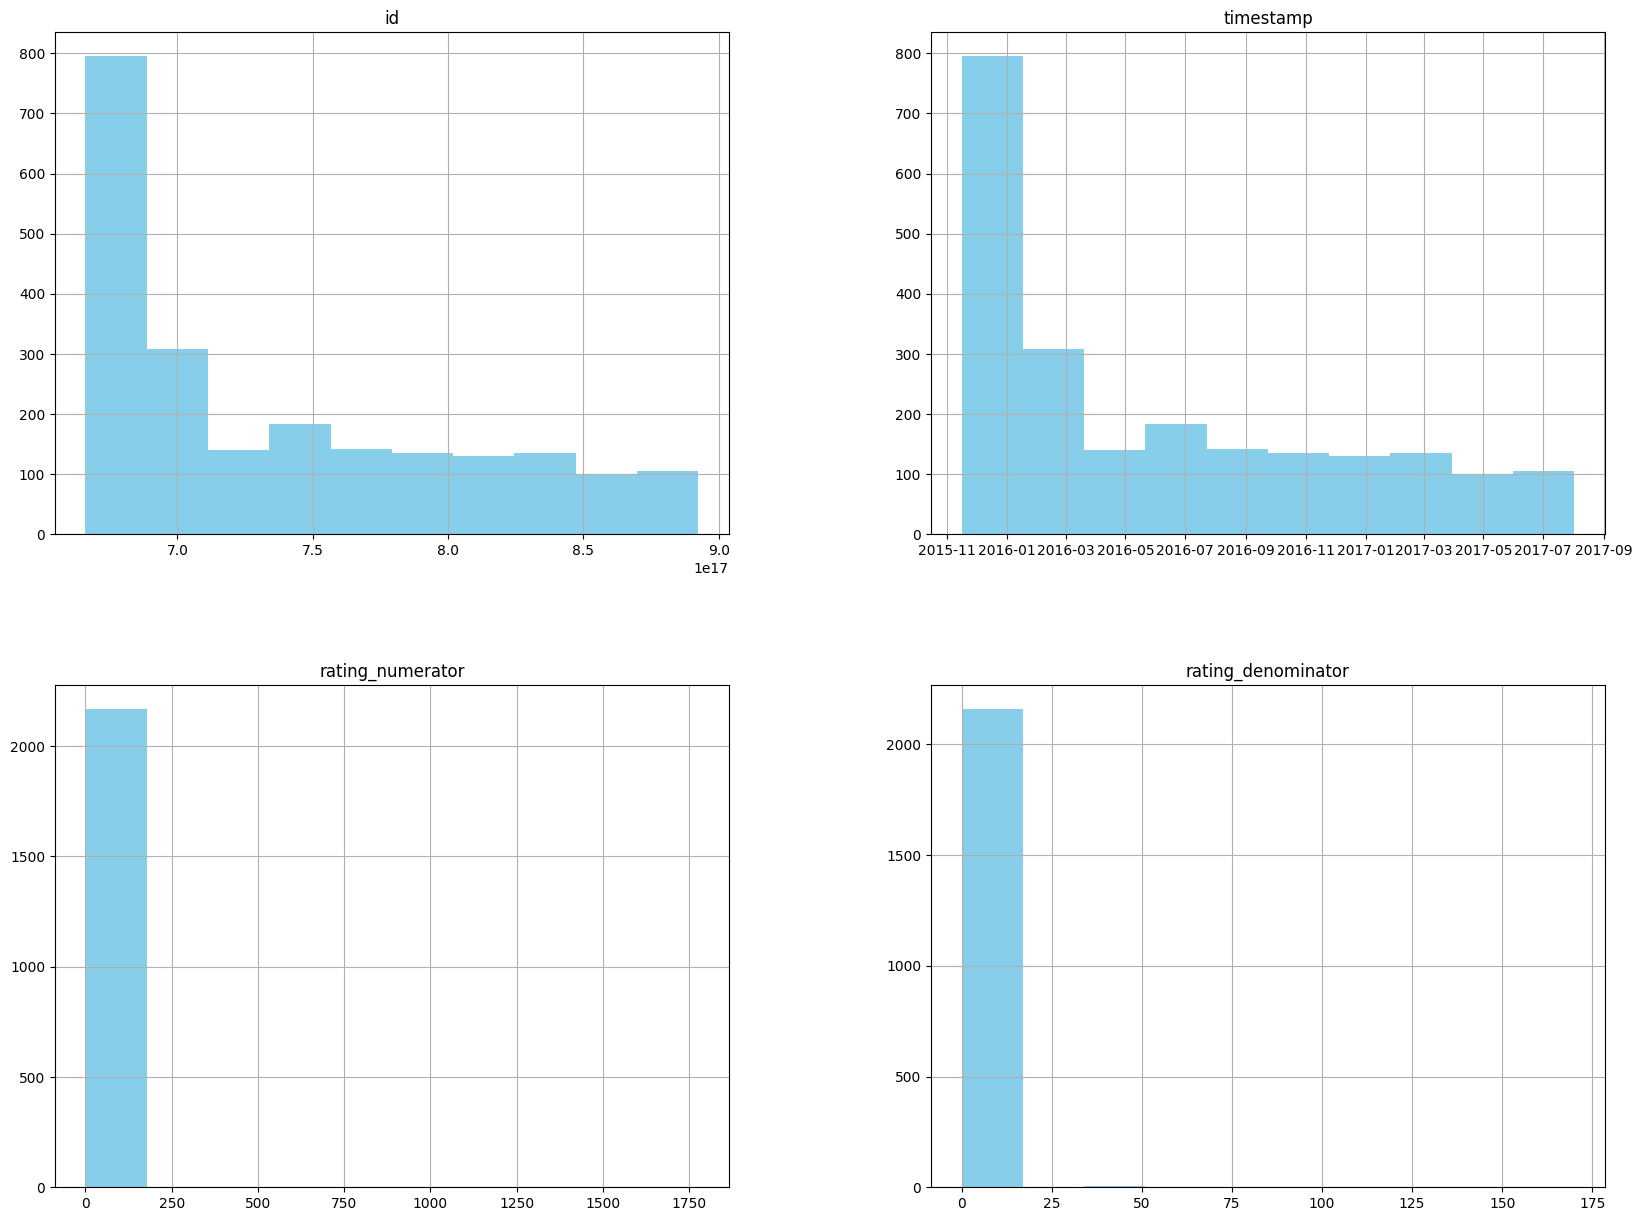

In [46]:
tacopy.hist(figsize=(20,15), color='skyblue');

<BarContainer object of 7 artists>

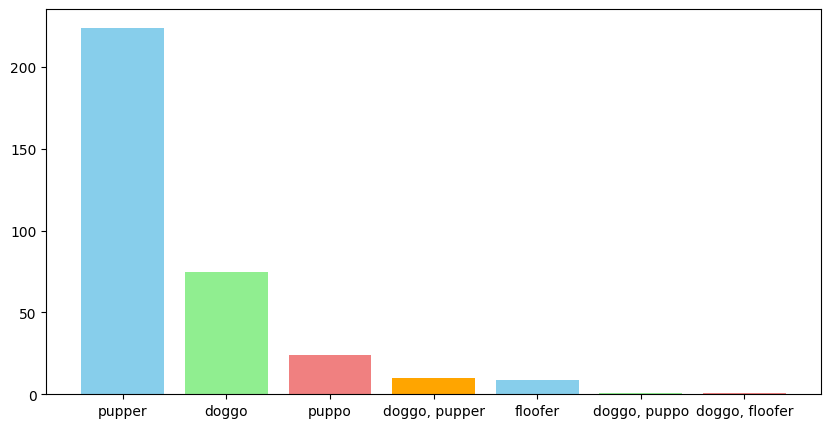

In [47]:
dog_stage = tacopy[tacopy["dog_stage"]!="None"]["dog_stage"].value_counts()
plt.figure(figsize=(10,5))
plt.bar(dog_stage.index, dog_stage.values,color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])

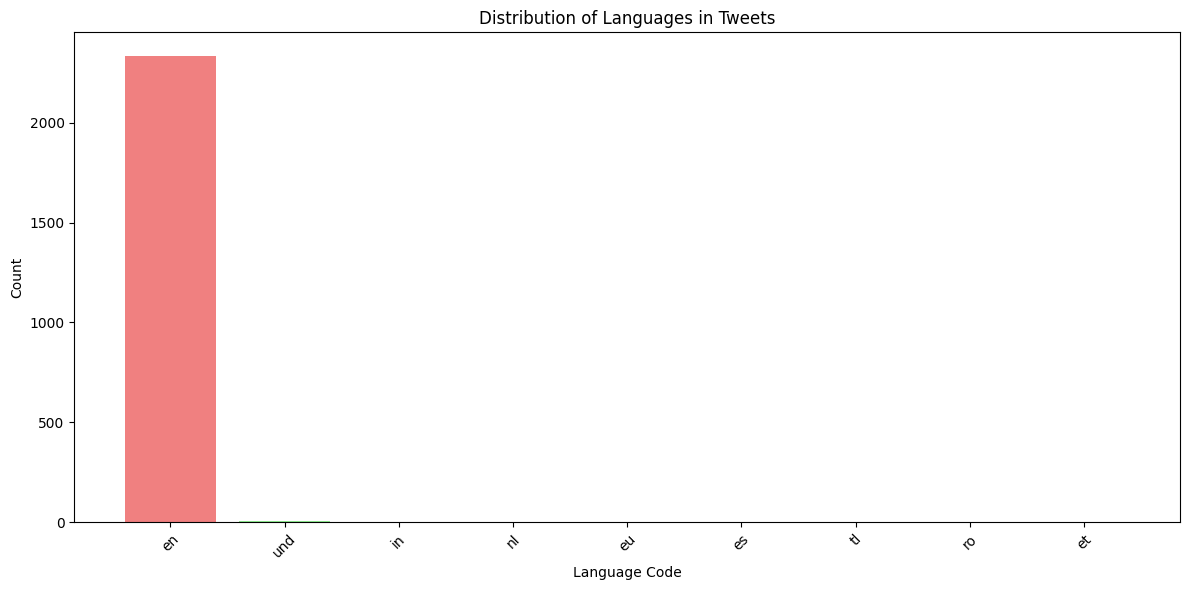

In [48]:
lang_counts = tjcopy["lang"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(range(len(lang_counts)), lang_counts.values,color=['lightcoral', 'lightgreen', 'lightcoral', 'orange'])
plt.xticks(range(len(lang_counts)), lang_counts.index, rotation=45)
plt.title('Distribution of Languages in Tweets')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()